In [1]:
import numpy as np
import scipy
import matplotlib
import pandas as pd
from numpy import genfromtxt
import json
import sys
import pandas
import matplotlib.pyplot as plt
import os

In [2]:
import plotly.offline as py
import plotly.graph_objs as go
from numpy import genfromtxt
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots

In [3]:
%matplotlib inline

In [4]:
# plt.style.use('seaborn')

In [5]:
#plt.style.available

In [6]:
# os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2019/bin/x86_64-darwin'
# print(os.getenv("PATH"))

In [7]:

lgndsize = 'x-large'
fontsize = 'xx-large'
# params = {'text.usetex': True,
#           'text.latex.preamble': [ # to conform with acmart style
#               r'\usepackage[T1]{fontenc}',
#               r'\usepackage[libertine]{newtxmath}',
#               r'\usepackage{libertine}'
#           ],
#           'font.weight': 'regular',
#           'legend.fontsize': lgndsize,         
#           'axes.labelsize': fontsize,
#           'axes.titlesize': fontsize,
#           'xtick.labelsize': lgndsize,
#           'ytick.labelsize': lgndsize,
#          }

# plt.style.use(['seaborn-paper']) # see plt.style.available
# plt.rcParams.update(params)

In [8]:
#df_soybean=pd.read_csv('../SA_6_param/Soybean-S1-6P.csv', delimiter=';', index_col=0)
#df_soybean_conf=pd.read_csv('../SA_6_param/Soybean-S1_conf-6P.csv', delimiter=';', index_col=0)

In [9]:
names_for_legend=('sugar-beet-2011', 'spring-barley-2012', 'sugar-beet-2014',
       'soybean-000-2015', 'sugar-beet-2017')

In [10]:
csv_list_horisonts =['Si_BD_Hor.csv', 'Si_Clay_Hor.csv',\
          'Si_CN_Hor.csv', 'Si_pH_Hor.csv', 'Si_Sand_Hor.csv','Si_SOC_Hor.csv']

In [11]:
csv_list_horisonts_ST =['ST_BD_Hor.csv', 'ST_Clay_Hor.csv',\
          'ST_CN_Hor.csv', 'ST_pH_Hor.csv', 'ST_Sand_Hor.csv','ST_SOC_Hor.csv']

Here `pref` is path to files locally

In [12]:
!pwd

/Users/mikhailgasanov/Documents/GIT/SA_agro_model/notebooks


In [13]:
pref = '../Results_csv/Results_soil_horizons/'

In [14]:
df_BD=pd.read_csv(pref+csv_list_horisonts_ST[0],delimiter=',',index_col=0,skiprows=[9])
df_Clay=pd.read_csv(pref+csv_list_horisonts_ST[1],delimiter=',',index_col=0,skiprows=[9])
df_CN=pd.read_csv(pref+csv_list_horisonts_ST[2],delimiter=',',index_col=0,skiprows=[9])
df_pH=pd.read_csv(pref+csv_list_horisonts_ST[3],delimiter=',',index_col=0,skiprows=[9])
df_Sand=pd.read_csv(pref+csv_list_horisonts_ST[4],delimiter=',',index_col=0,skiprows=[9])
df_SOC=pd.read_csv(pref+csv_list_horisonts_ST[5],delimiter=',',index_col=0,skiprows=[9])

In [15]:
df_pH.fillna(value=0, inplace=True)
df_CN.fillna(value=0, inplace=True)

In [16]:
new_df_BD=df_BD.sort_index(ascending=False)
new_df_Clay=df_Clay.sort_index(ascending=False)
new_df_Sand=df_Sand.sort_index(ascending=False)
new_df_pH=df_pH.sort_index(ascending=False)
new_df_CN=df_CN.sort_index(ascending=False)
new_df_SOC=df_SOC.sort_index(ascending=False)

In [17]:
skala_depth=(0, 40, 50, 60, 70, 80, 90, 100)

In [18]:
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=("Bulk Density","Clay", \
                                    "Sand", "pH", "C:N ratio", "SOC"))
fig.add_trace(go.Heatmap(
        z=new_df_BD,
        x=new_df_BD.columns,
        y=new_df_BD.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=1)
fig.add_trace(go.Heatmap(
        z=new_df_Clay,
        x=new_df_Clay.columns,
        y=new_df_Clay.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=2)
fig.add_trace(go.Heatmap(
        z=new_df_Sand,
        x=new_df_Sand.columns,
        y=new_df_Sand.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=3)
fig.add_trace(go.Heatmap(
        z=new_df_pH,
        x=new_df_pH.columns,
        y=new_df_pH.index,
        showscale=False,
        colorscale="Sunset"),
        row=2,col=1)
fig.add_trace(go.Heatmap(
        z=new_df_CN,
        x=new_df_CN.columns,
        y=new_df_CN.index,
        showscale=False,
        colorscale="Sunset"),
               row=2,col=2)
fig.add_trace(go.Heatmap(
        z=new_df_SOC,
        x=new_df_SOC.columns,
        y=new_df_SOC.index,
        autocolorscale=False,
        colorscale="Sunset"),
        row=2,col=3)
fig.update_xaxes(tickvals=[], row=1)
fig.update_yaxes(autorange='reversed')
fig.update_yaxes(title='Depth, cm', row=1,col=1)
fig.update_yaxes(title='Depth, cm', row=2,col=1)
fig.update_layout( font=dict(
        family="Roman, serif",
        size=12,
        color="black"))

fig.show()
# fig.write_image('Heatmap_horizonts_Sunset.svg')

In [19]:
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=("Bulk Density","Clay", \
                                    "Sand", "pH", "C:N ratio", "SOC"))
fig.add_trace(go.Heatmap(
        z=new_df_BD,
        x=new_df_BD.columns,
        y=new_df_BD.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=1)
fig.add_trace(go.Heatmap(
        z=new_df_Clay,
        x=new_df_Clay.columns,
        y=new_df_Clay.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=2)
fig.add_trace(go.Heatmap(
        z=new_df_Sand,
        x=new_df_Sand.columns,
        y=new_df_Sand.index,
        showscale=False,
        colorscale="Sunset"),
        row=1,col=3)
fig.add_trace(go.Heatmap(
        z=new_df_pH,
        x=new_df_pH.columns,
        y=new_df_pH.index,
        showscale=False,
        colorscale="Sunset"),
        row=2,col=1)
fig.add_trace(go.Heatmap(
        z=new_df_CN,
        x=new_df_CN.columns,
        y=new_df_CN.index,
        showscale=False,
        colorscale="Sunset"),
               row=2,col=2)
fig.add_trace(go.Heatmap(
        z=new_df_SOC,
        x=new_df_SOC.columns,
        y=new_df_SOC.index,
        autocolorscale=False,
        colorscale="Sunset"),
        row=2,col=3)
fig.update_xaxes(tickvals=[], row=1)
fig.update_yaxes(autorange='reversed')
fig.update_yaxes(title='Depth, cm', row=1,col=1)
fig.update_yaxes(title='Depth, cm', row=2,col=1)
fig.update_layout( font=dict(
        family="Roman, serif",
        size=12,
        color="black"))

fig.show()
# fig.write_image('Heatmap_horizonts_Sunset.svg')

TypeError: unhashable type: 'Colormap'

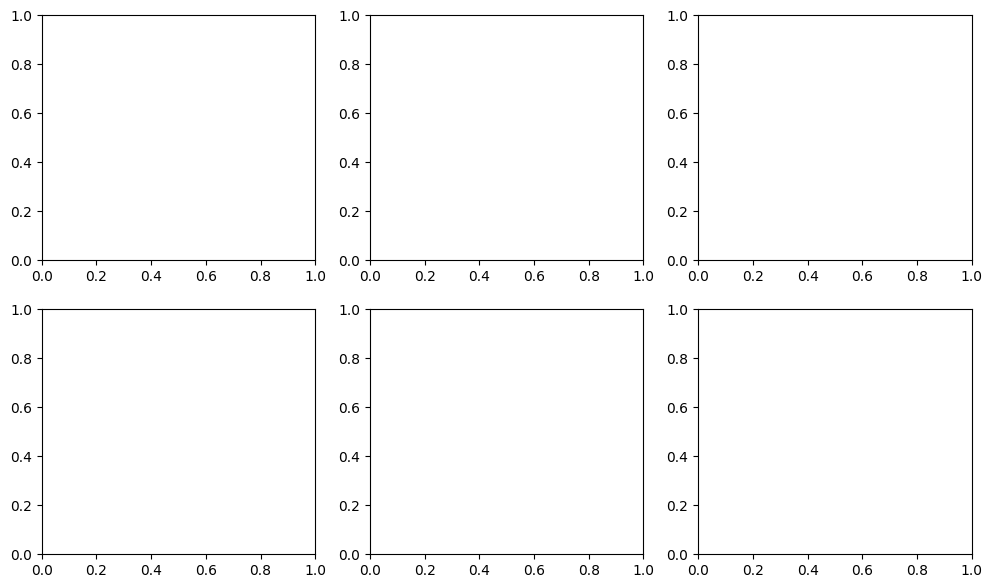

In [28]:
# Убедитесь, что matplotlib импортирован
import matplotlib.pyplot as plt
import numpy as np

from cmap import Colormap

cm = Colormap('tol:sunset')  # case insensitive
# Предполагается, что pandas уже импортирован как pd и данные загружены

# --- Данные из предыдущих ячеек ---
# new_df_BD, new_df_Clay, new_df_Sand, new_df_pH, new_df_CN, new_df_SOC
# ---

# Список DataFrame'ов и заголовков для графиков
data_frames = [new_df_BD, new_df_Clay, new_df_Sand, new_df_pH, new_df_CN, new_df_SOC]
titles = ["Bulk Density", "Clay", "Sand", "pH", "C:N ratio", "SOC"]

# Выбор цветовой карты Matplotlib (например, 'plasma' или 'inferno' похожи на 'Sunset')
cmap = cm

# Создаем сетку графиков 2x3
# figsize регулирует общий размер фигуры
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharex=False, sharey=False) # Не делим оси пока

images = [] # Список для хранения объектов imshow для colorbar

# Проходим по строкам и столбцам сетки
for r in range(2):
    for c in range(3):
        idx = r * 3 + c # Индекс текущего графика (0-5)
        ax = axes[r, c] # Получаем текущий объект осей
        df = data_frames[idx] # Получаем соответствующий DataFrame

        # Отображаем данные как тепловую карту с помощью imshow
        # aspect='auto' позволяет прямоугольникам растягиваться
        # interpolation='nearest' показывает четкие пиксели без сглаживания
        im = ax.imshow(df, cmap=cm, aspect='auto', interpolation='nearest')
        images.append(im) # Сохраняем для colorbar

        ax.set_title(titles[idx]) # Устанавливаем заголовок

        # Настройка оси Y (глубина) - только для первого столбца
        if c == 0:
            ax.set_yticks(np.arange(len(df.index))) # Позиции тиков по индексам строк
            ax.set_yticklabels(df.index) # Метки тиков из индекса DataFrame
            ax.set_ylabel("Depth, cm")
        else:
            ax.set_yticklabels([]) # Скрываем метки Y для других столбцов

        # Настройка оси X (эксперименты) - только для нижнего ряда
        if r == 1:
            ax.set_xticks(np.arange(len(df.columns))) # Позиции тиков по индексам столбцов
            # Устанавливаем метки X и поворачиваем для читаемости
            ax.set_xticklabels(df.columns, rotation=45, ha='right')
        else:
            ax.set_xticklabels([]) # Скрываем метки X для верхнего ряда

        # Инвертируем ось Y, чтобы глубина увеличивалась вниз
        ax.invert_yaxis()

        # Добавляем контуры для последнего графика (SOC)
        if idx == 5:
            # Создаем сетку координат X, Y по индексам DataFrame для contour
            x_coords = np.arange(df.shape[1])
            y_coords = np.arange(df.shape[0])
            X_idx, Y_idx = np.meshgrid(x_coords, y_coords)
            # Рисуем контуры поверх imshow
            # df.values используется для передачи NumPy массива в contour
            CS = ax.contour(X_idx, Y_idx, df.values, colors='black', linewidths=1)

# Добавляем единую цветовую шкалу для всех графиков
# Используем первый объект im, так как у всех одинаковая cmap
# ax=axes.ravel().tolist() указывает, что colorbar относится ко всем подграфикам
cbar = fig.colorbar(images[0], ax=axes.ravel().tolist(), shrink=0.6)
cbar.set_label('Значение') # Можно добавить подпись к шкале

# Автоматически подгоняем расположение элементов, чтобы избежать наложений
plt.tight_layout()

# Отображаем график
plt.show()

# Опционально: сохранение фигуры
# fig.savefig('Heatmap_horizonts_matplotlib.png', dpi=300)
# fig.savefig('Heatmap_horizonts_matplotlib.svg')